# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 3.5 MB 11.1 MB/s 
     |████████████████████████████████| 1.2 MB 39.4 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 895 kB 39.1 MB/s 
     |████████████████████████████████| 6.8 MB 38.1 MB/s 
     |████████████████████████████████| 596 kB 28.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=9fbc310f6afaf660a719b565464eaf7ba90c3c7ad4191cffac0b9ca1e5dc4f21
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

#print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

#print(type(newsgroups_train.data[0]))
#print(type(newsgroups_train.target))
#print(len(newsgroups_train.target_names))

<class 'str'>
<class 'numpy.ndarray'>
20


In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
#preprocessing of sentences and the article

def remove_punct(text):
  
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [6]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [7]:
x, y = newsgroups_train.data, newsgroups_train.target     # x is list of string, where each string is article and y is a numpy array 
                                                          # representing the article number
train=[]

for article in x:
  train.append(get_review_embedding(article))


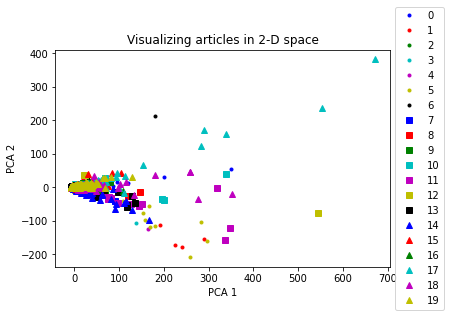

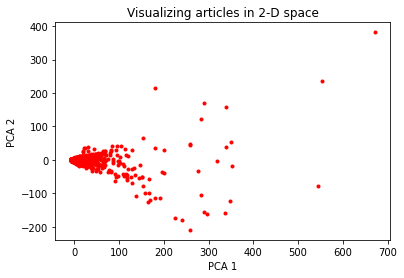

In [8]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sampleData = StandardScaler().fit_transform(train)  # mean=0 SD=1
pca = PCA(n_components=2)
pcaData = pca.fit_transform(sampleData)


pcaDataT=pcaData.T
col=['b','r','g','c','m','y','k']   #7 colours
symbol=['.','s','^']                #3 types to make total of 21 pattern

seperateclass=[]
for i in range(21):
  seperateclass.append([])

for i in range(len(pcaData)):
  seperateclass[y[i]].append(pcaData[i])


for i in range(21):
  if(len(seperateclass[i])==0):
    continue
  seperateclass[i]=np.array(seperateclass[i])
  seperateclass[i]=seperateclass[i].T
  plt.plot(seperateclass[i][0],seperateclass[i][1],col[i%7]+symbol[int(i/7)],label=str(i))


plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualizing articles in 2-D space")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



plt.plot(pcaDataT[0],pcaDataT[1],"r.")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualizing articles in 2-D space")
plt.show()




# K_Means Algorithm


In [9]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=4).fit(train)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

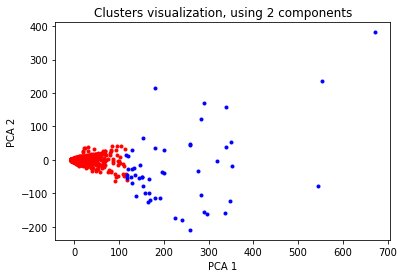

In [10]:
#code for visualisation of clusters

class1=[]
class2=[]

output=kmeans.labels_

for i in range(len(output)):
  if int(output[i])==0:
    class1.append(pcaData[i])
  else:
    class2.append(pcaData[i])


class1=np.array(class1)
class1=class1.T
class2=np.array(class2)
class2=class2.T

plt.plot(class1[0],class1[1],"r.")
plt.plot(class2[0],class2[1],"b.")

#center=kmeans.cluster_centers_
#plt.plot(center[0][0],center[0][1],"k^")
#plt.plot(center[1][0],center[1][1],"k^")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters visualization, using 2 components")
plt.show()



# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







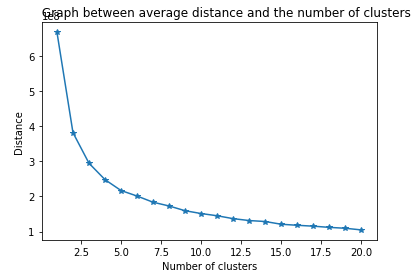

In [11]:
def elbow_method(train):
  distance=[]  # for k=i+1 what's the average distance
  maxCluster=20

  for i in range(1,21):
    kmeans = KMeans(n_clusters=i, random_state=7).fit(train)
    distance.append(kmeans.inertia_)   # distance is avg sum of squared distance

  plt.plot(list(range(1,21)),distance,marker="*")  
  plt.xlabel("Number of clusters")  
  plt.ylabel("Distance")
  plt.title("         Graph between average distance and the number of clusters")
  plt.show()


elbow_method(train)
  


**Use elbow method to find the optimal number of clusters.
Answer: Number of optimal cluster is around 3. Because after that there the inertia is start decreasing linearly (elbow like structure)**

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




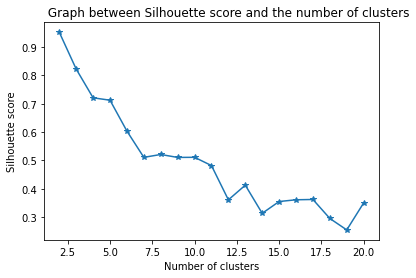

In [12]:
from sklearn.metrics import silhouette_score
def silhouette_score_cacl(train):
  """
    a: The mean distance between a sample and all other points in the same class.
    b: The mean distance between a sample and all other points in the next nearest cluster.
    score = b-a/max(a,b)
  """
  score=[]  # for k=i+1 what's the average distance
  maxCluster=20

  for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=7).fit(train)
    pred = kmeans.predict(train)
    score.append(silhouette_score(np.array(train),kmeans.labels_,metric='euclidean')) # it is in between [1,-1], 1 being the best

  plt.plot(list(range(2,21)),score,marker="*")  
  plt.xlabel("Number of clusters")  
  plt.ylabel("Silhouette score")
  plt.title("         Graph between Silhouette score and the number of clusters")
  plt.show()

silhouette_score_cacl(train)

### **Optimal Number of cluster using Silhouette is 2. The score vary from [-1,1], with 1 being the best. So number of cluster will be 2.**

# Agglomerative clustering

In [13]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClusteringCalc():
  clustering = AgglomerativeClustering().fit(pcaData)     #by default merge into two clusters
  return clustering.labels_

output=AgglomerativeClusteringCalc()


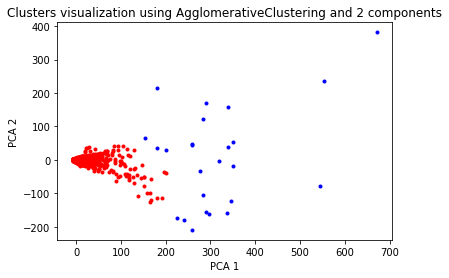

In [35]:
#code for visualisation of clusters
class1=[]
class2=[]

for i in range(len(output)):
  if int(output[i])==0:
    class1.append(pcaData[i])
  else:
    class2.append(pcaData[i])


class1=np.array(class1)
class1=class1.T
class2=np.array(class2)
class2=class2.T

plt.plot(class1[0],class1[1],"r.")
plt.plot(class2[0],class2[1],"b.")

#center=kmeans.cluster_centers_
#plt.plot(center[0][0],center[0][1],"k^")
#plt.plot(center[1][0],center[1][1],"k^")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters visualization using AgglomerativeClustering and 2 components")
plt.show()




# Dendogram


*   Try to understand the difference between agglomerative clustering and Divisive clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



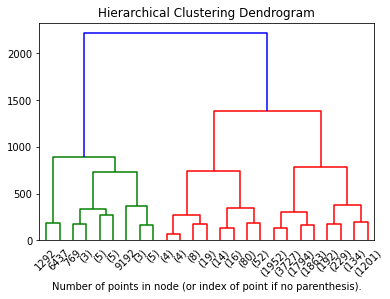

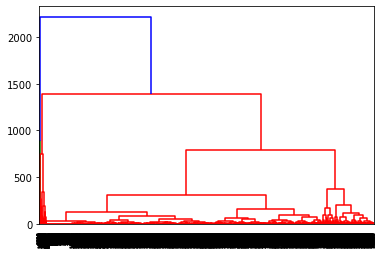

In [40]:
# code to write dendogram

from scipy.cluster import hierarchy


from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):

    counts = []
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        count = 0
        for child_idx in merge:
            add=1 # leaf node
            if child_idx >= n_samples:
                add=counts[child_idx - n_samples]
            count += add
        counts.append(count)

    counts=np.array(counts)
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# Distance_threshold=0 to make full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pcaData)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Different plot
temp = hierarchy.linkage(pcaData, method='ward')
plt.figure()
dn = hierarchy.dendrogram(temp)

**Optimal Number of Clustering is 2. As there will be a very large gap if we want to reduce it to 1.**

**Divisive and Agglomerative Clusttering are types of hierarchial clustering. The main difference between them is Divisive is Top Down and Agglomerative is is bottom up. We don't need to provide the number of cluster, in both the cases. 
Agglomerative is order O(n^2 logn) algorithm but can be optimized to O(n^2). Divisive at start assumes all elements belong to single cluster and keep on breaking it into smaller subparts unless all elements are as a clustor on its own. It is also linear time algorithm.** 

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


